In [1]:
import pandas as pd
import thinkstats2 as ts2
import thinkplot as tp
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline

In [2]:
df = pd.read_csv("dataframe.csv")

In [7]:
df.columns = ['date', 'weekend', 'rain', 'snowdpth', 'snow', 'trips', 'pmt']

In [9]:
df["date"]=pd.to_datetime(df.date, infer_datetime_format=True)

In [34]:
MTA = pd.read_csv("entries_per_hour.csv")

In [35]:
MTA.head()

,date,entries_per_hour
0,2014-02-01,137358.7917
1,2014-02-02,114924.0000
2,2014-02-03,212375.3750
3,2014-02-04,251517.1667
4,2014-02-05,214415.3333


In [36]:
MTA["date"]=pd.to_datetime(MTA.date, infer_datetime_format=True)

In [37]:
dataframe = df.merge(right=MTA, left_on="date", right_on="date", how='left')

In [38]:
dataframe.head()

,date,weekend,rain,snowdpth,snow,trips,pmt,entries_per_hour
0,2012-01-01,1.0,0.05,0.0,0.0,212782.0,1011660.0,NaN
1,2012-01-02,0.0,0.00,0.0,0.0,341383.0,1914804.0,NaN
2,2012-01-03,0.0,0.00,0.0,0.0,438458.0,2084644.0,NaN
3,2012-01-04,0.0,0.00,0.0,0.0,473987.0,2122041.0,NaN
4,2012-01-05,0.0,0.00,0.0,0.0,488687.0,2189748.0,NaN


In [50]:
df.columns = ["date", "weekend","rain", "snowdpth", "snow", "trips", "pmt", "mta"]

In [48]:
df = dataframe

In [49]:
df.head()

,index,date,weekend,snowdpth,snow,trips,pmt,mta
0,2012-01-01,1.0,0.05,0.0,0.0,212782.0,1011660.0,NaN
1,2012-01-02,0.0,0.00,0.0,0.0,341383.0,1914804.0,NaN
2,2012-01-03,0.0,0.00,0.0,0.0,438458.0,2084644.0,NaN
3,2012-01-04,0.0,0.00,0.0,0.0,473987.0,2122041.0,NaN
4,2012-01-05,0.0,0.00,0.0,0.0,488687.0,2189748.0,NaN


### Entries and Exits
Plot the histogram for the entries and exits.

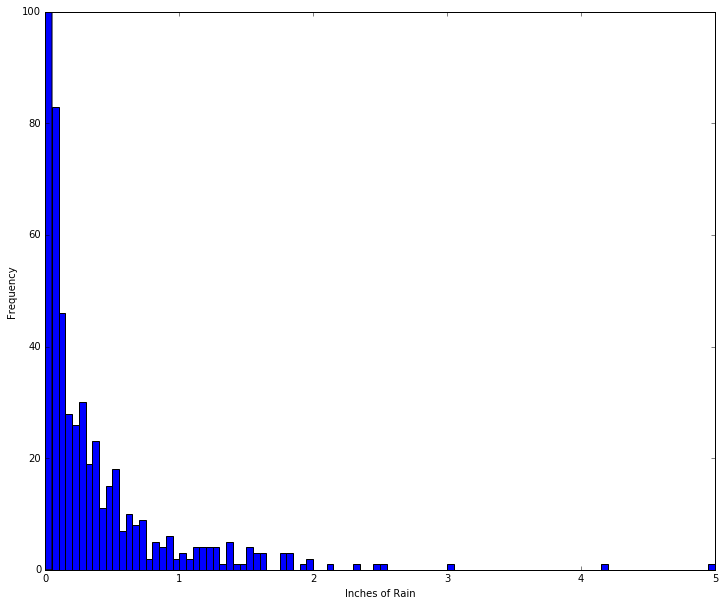

In [65]:
plt.figure(figsize=(12,10))
rain = df.rain
plt.hist(rain, bins=100, range=(0,5))
plt.xlabel("Inches of Rain")
plt.ylabel("Frequency")
plt.axis([0, 5, 0, 100])
plt.show()

In [30]:
wxd['date'] = pd.to_datetime(wxd.date, format="%Y%m%d")

In [31]:
merge = MTA.merge(right=wxd, left_on="date", right_on="date", how='inner')

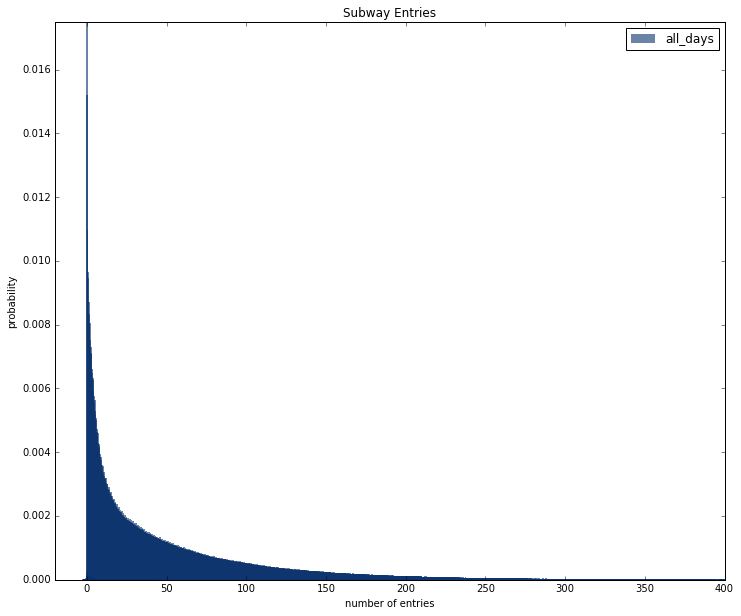

C:\Users\J.X\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


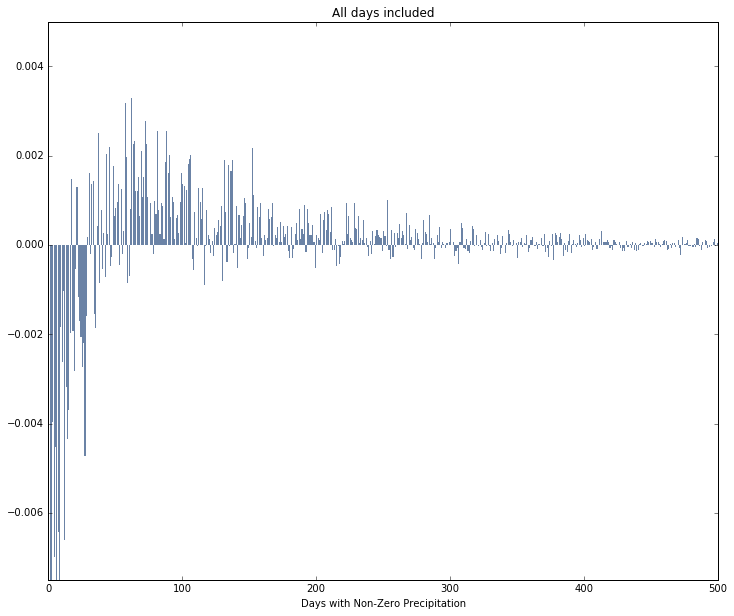

In [75]:
all_entries = merge.entries_per_hour
rain_days = merge[merge.prcp>0].entries_per_hour
all_entries_pmf = ts2.Pmf(all_entries, label='all_days')
rain_days_pmf = ts2.Pmf(rain_days, 'any_rain')

plt.figure(figsize=(12,10))
tp.Hist(all_entries_pmf, width=1)
tp.Show(title='Subway Entries', ylabel='probability', xlabel='number of entries', axis=[-20, 400, 0, 0.0175])

entries = range(1, 750)
diffs = []
for entry in entries:
    p1 = all_entries_pmf.Prob(entry)
    p2 = rain_days_pmf.Prob(entry)
    diff = 100*(p1-p2)
    diffs.append(diff)

plt.figure(figsize=(12,10))
tp.Bar(entries, diffs)
tp.Show(title="All days included", xlabel="Days with Non-Zero Precipitation",  axis=[0, 500, -0.0075, 0.005])

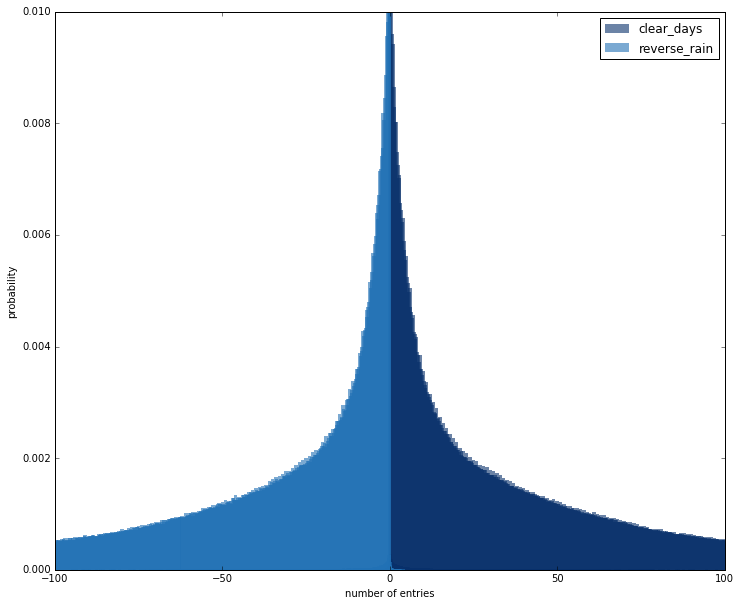

C:\Users\J.X\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


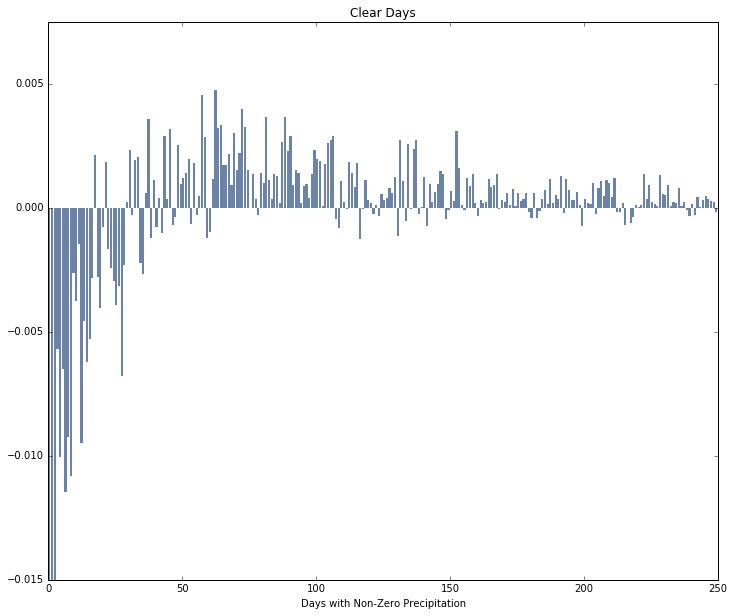

In [87]:
clear_days = merge[merge.prcp==0].entries_per_hour
reversed_rain_days = merge[merge.prcp>0].entries_per_hour*-1
rain_days = merge[merge.prcp>0].entries_per_hour
clear_days_pmf = ts2.Pmf(clear_days, label='clear_days')
reversed_rain_days_pmf = ts2.Pmf(reversed_rain_days, 'reverse_rain')

plt.figure(figsize=(12,10))
tp.Hist(clear_days_pmf, width=1)
tp.Hist(reversed_rain_days_pmf, width=1)
tp.Show(ylabel='probability', xlabel='number of entries', axis=[-100, 100, 0, 0.01])

entries = range(0, 750)
diffs = []
for entry in entries:
    p1 = clear_days_pmf.Prob(entry)
    p2 = rain_days_pmf.Prob(entry)
    diff = 100*(p1-p2)
    diffs.append(diff)

plt.figure(figsize=(12,10))
tp.Bar(entries, diffs)
tp.Show(title="Clear Days", xlabel="Days with Non-Zero Precipitation", axis=[0, 250, -0.015, 0.0075])

In [79]:
clear_mean = merge[merge.prcp==0].entries_per_hour.mean()
any_rain_mean = merge[merge.prcp>0].entries_per_hour.mean()
rain_mean25 = merge[merge.prcp>0.25].entries_per_hour.mean()
rain_mean50 = merge[merge.prcp>0.50].entries_per_hour.mean()
diff = clear_mean - any_rain_mean
print("Clear mean is equal to: ", clear_mean,".")
print("The mean with any rain is equal to: ", any_rain_mean,".")
print("The mean with more than 0.25 inches is equal to: ", rain_mean25,".")
print("The mean with more than 0.5 inches is equal to: ", rain_mean50,".")

Clear mean is equal to:  46.61995554670089 .
The mean with any rain is equal to:  45.73371485465464 .
The mean with more than 0.25 inches is equal to:  44.39744467988852 .
The mean with more than 0.5 inches is equal to:  43.21159612587562 .


[0, 2.25, 0, 40]

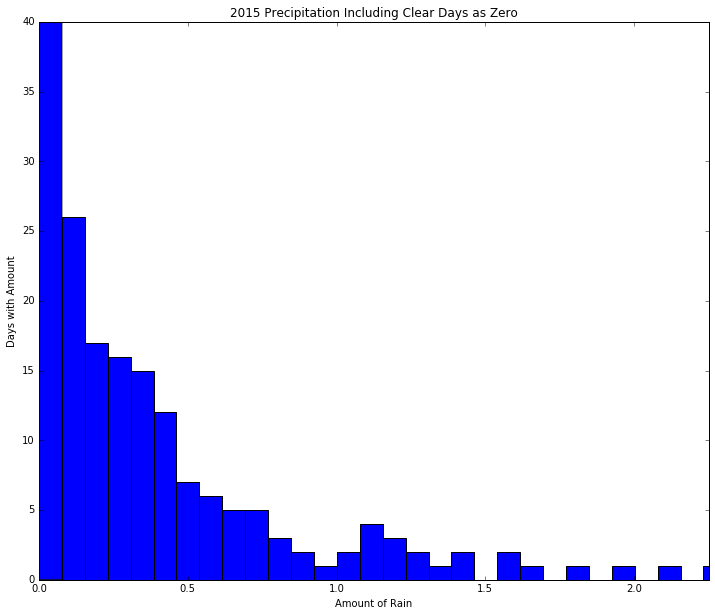

In [39]:
plt.figure(figsize=(12,10))
weather = wxd.prcp
plt.hist(weather, bins=30)
plt.title("2015 Precipitation Including Clear Days as Zero")
plt.xlabel("Amount of Rain")
plt.ylabel("Days with Amount")
plt.axis([0, 2.25, 0, 40])

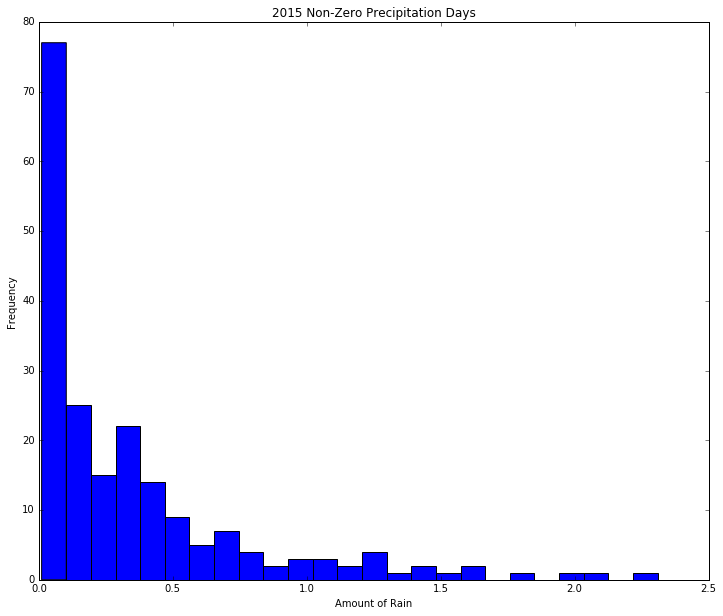

In [41]:
plt.figure(figsize=(12,10))
any_rain = wxd[wxd.prcp>0].prcp
plt.hist(any_rain, bins=25)
plt.title("2015 Non-Zero Precipitation Days")
plt.xlabel("Amount of Rain")
plt.ylabel("Frequency")

### Mean Entries Against Rainfall
Populate a date frame with all the unique measurements of rainfall in a given data and the corresponding mean entries and exits per period for the corresponding day or days. 

Plot a scatter graph with the mean entries and exits via the measured precipitation.

In [42]:
work_days = merge[(merge.weekday==1)&(merge.holiday==0)]
weekends = merge[merge.weekday==0]
play_days = merge[(merge.weekday==0)|(merge.holiday==1)]

In [68]:
mean_rain_df = pd.read_csv("mean_unique_rain.csv")
mean_work_rain_df = pd.read_csv("mean_work_rain.csv")
mean_weekend_rain_df = pd.read_csv("mean_weekend_rain.csv")
mean_play_rain_df = pd.read_csv("mean_play_rain.csv")
median_rain_df = pd.read_csv("median_unique_rain.csv")
median_work_rain_df = pd.read_csv("median_work_rain.csv")
median_weekend_rain_df = pd.read_csv("median_weekend_rain.csv")
median_play_rain_df = pd.read_csv("median_play_rain.csv")

pd.options.mode.chained_assignment = None

In [69]:
df.head()

,date,weekend,rain,snowdpth,snow,trips,pmt,mta
0,2012-01-01,1.0,0.05,0.0,0.0,212782.0,1011660.0,NaN
1,2012-01-02,0.0,0.00,0.0,0.0,341383.0,1914804.0,NaN
2,2012-01-03,0.0,0.00,0.0,0.0,438458.0,2084644.0,NaN
3,2012-01-04,0.0,0.00,0.0,0.0,473987.0,2122041.0,NaN
4,2012-01-05,0.0,0.00,0.0,0.0,488687.0,2189748.0,NaN


When means for all days are calculated:

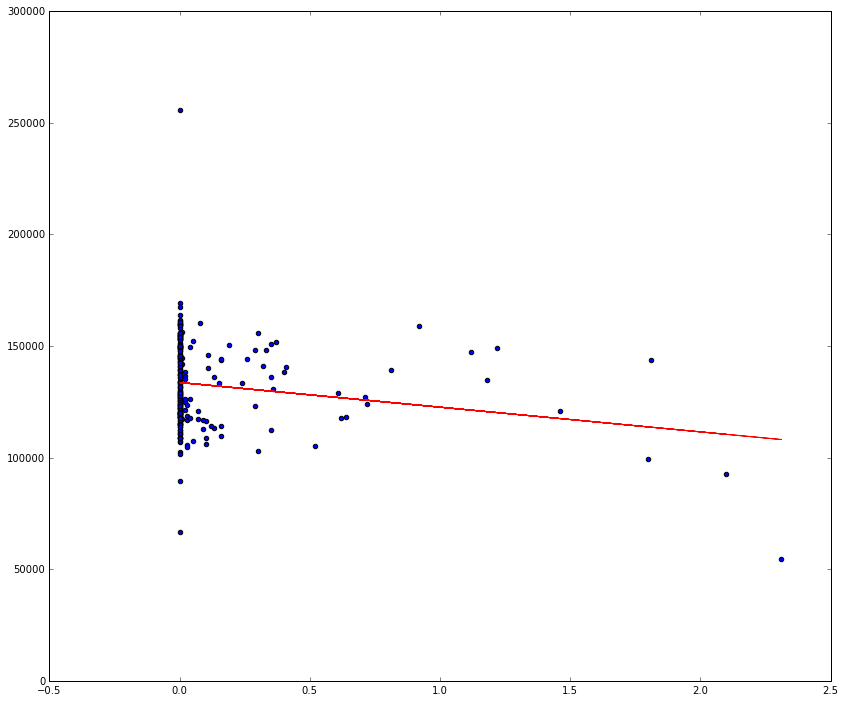

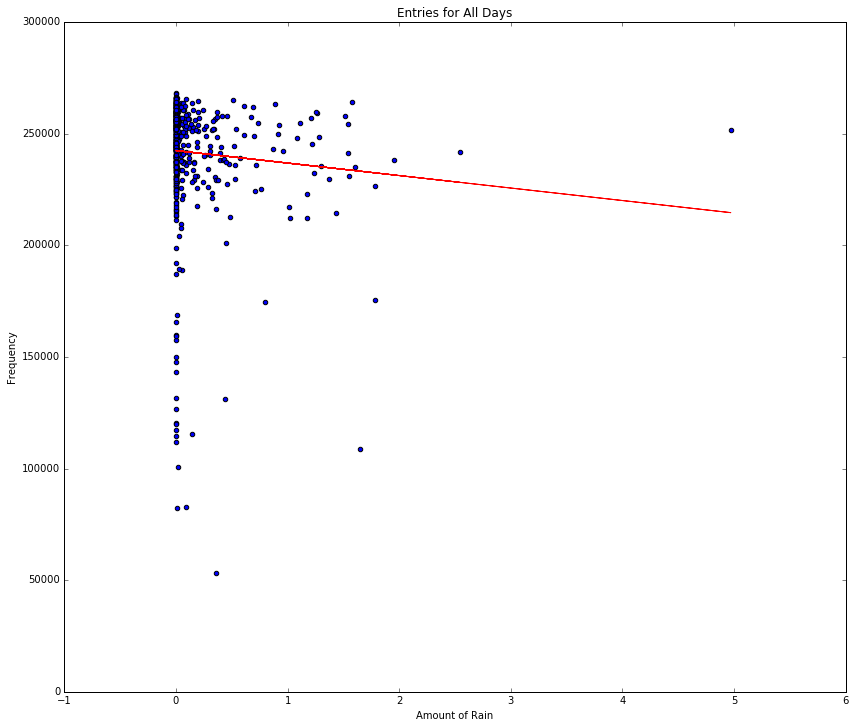

In [89]:
x = df[(df.mta>0)&(df.weekend==1)].rain
y = df[(df.mta>0)&(df.weekend==1)].mta

x1 = df[(df.mta>0)&(df.weekend==0)].rain
y1 = df[(df.mta>0)&(df.weekend==0)].mta


fig, ax = plt.subplots(figsize=(14,12))
fig1, ax1 = plt.subplots(figsize=(14,12))
fit = np.polyfit(x, y, deg=1)
fit1 = np.polyfit(x1, y1, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax1.plot(x1, fit1[0] * x1 + fit1[1], color='red')
ax.scatter(x, y)
ax1.scatter(x1, y1)
plt.title("Entries for All Days")
plt.xlabel("Amount of Rain")
plt.ylabel("Frequency")
plt.show()

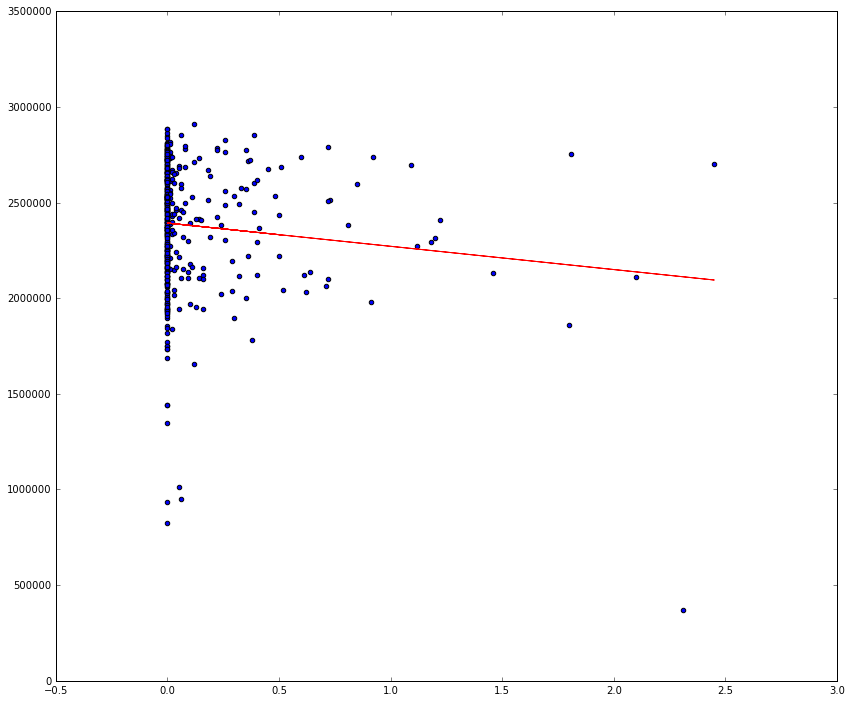

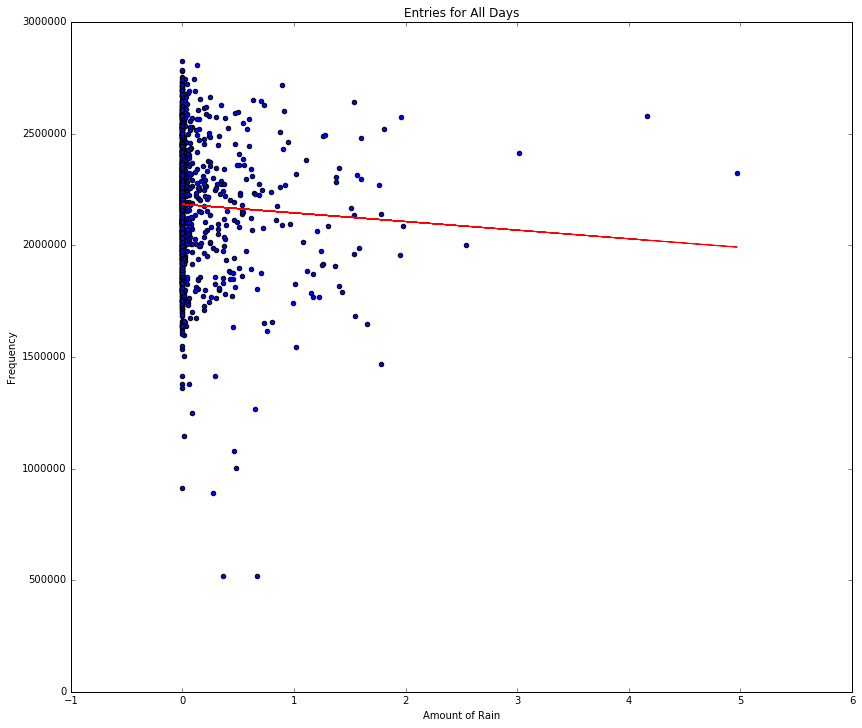

2514169.83394


In [91]:
x = df[(df.pmt>0)&(df.weekend==1)].rain
y = df[(df.pmt>0)&(df.weekend==1)].pmt

x1 = df[(df.pmt>0)&(df.weekend==0)].rain
y1 = df[(df.pmt>0)&(df.weekend==0)].pmt


fig, ax = plt.subplots(figsize=(14,12))
fig1, ax1 = plt.subplots(figsize=(14,12))
fit = np.polyfit(x, y, deg=1)
fit1 = np.polyfit(x1, y1, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax1.plot(x1, fit1[0] * x1 + fit1[1], color='red')
ax.scatter(x, y)
ax1.scatter(x1, y1)
plt.title("Entries for All Days")
plt.xlabel("Amount of Rain")
plt.ylabel("Frequency")
plt.show()

print(fit[1]-fit[0])

When the means are only calculated for work days (not weekends or federal holidays):

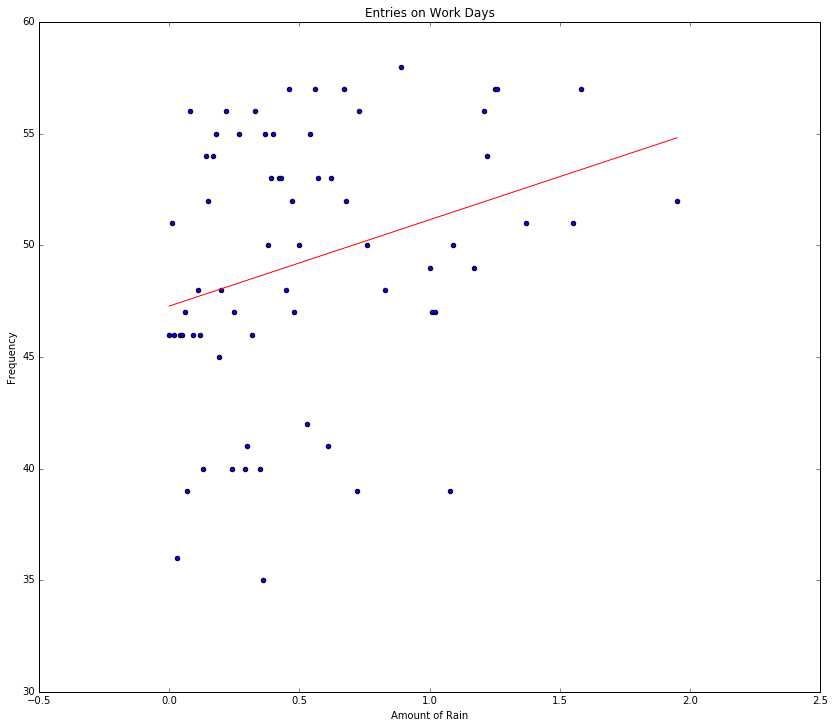

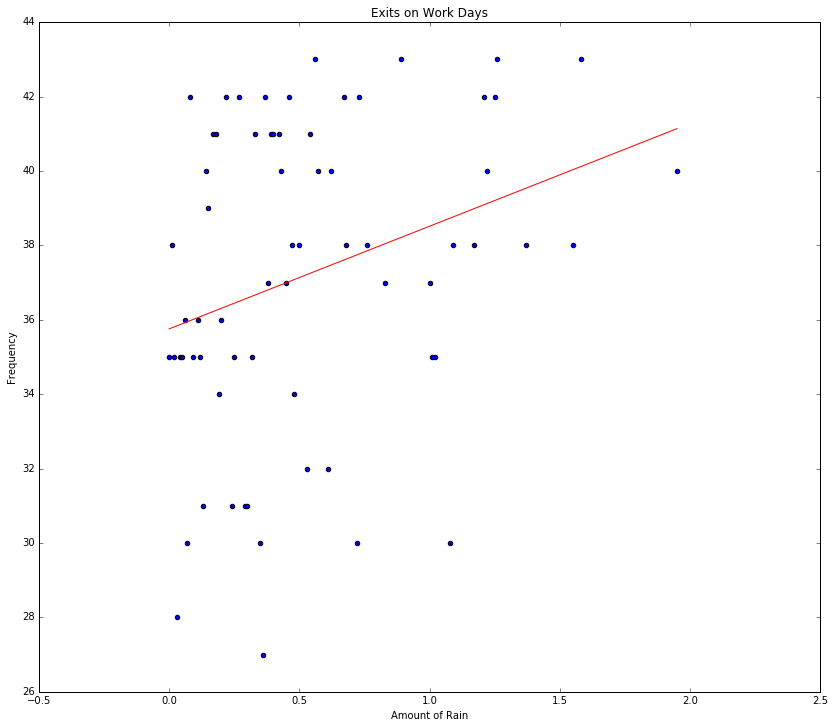

In [84]:
for i in range(len(mean_work_rain_df.index)):
        value = mean_work_rain_df.measurement[i]
        mean_work_rain_df.mean_entries[i] = merge[merge.prcp==value].entries_per_hour.mean()
        mean_work_rain_df.mean_exits[i] = merge[merge.prcp==value].exits_per_hour.mean()

x = mean_work_rain_df.measurement
y = mean_work_rain_df.mean_entries


fig, ax = plt.subplots(figsize=(14,12))
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
plt.title("Entries on Work Days")
plt.xlabel("Amount of Rain")
plt.ylabel("Frequency")
plt.show()

x = mean_work_rain_df.measurement
y = mean_work_rain_df.mean_exits

fig, ax = plt.subplots(figsize=(14,12))
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
plt.title("Exits on Work Days")
plt.xlabel("Amount of Rain")
plt.ylabel("Frequency")
plt.show()

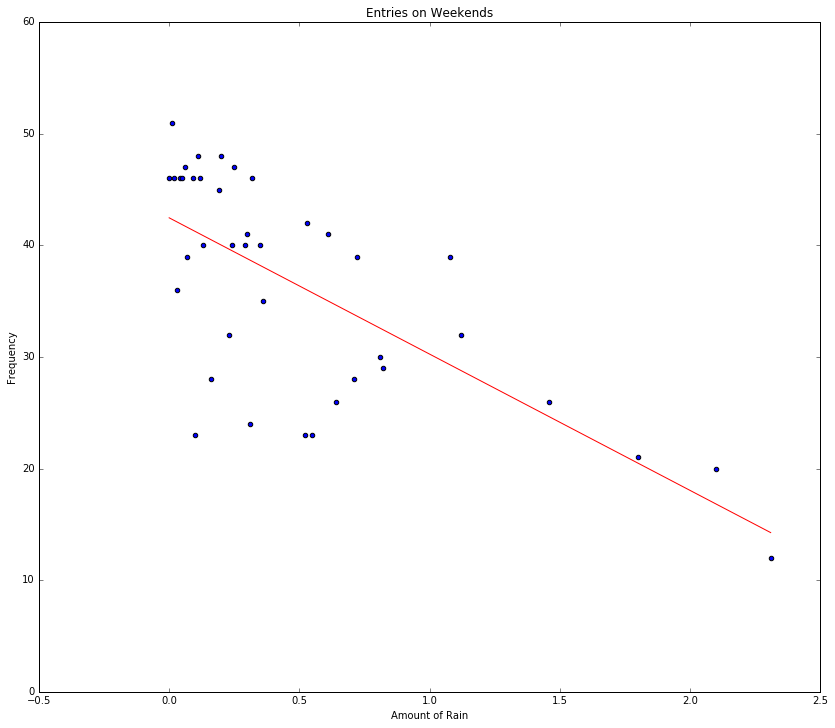

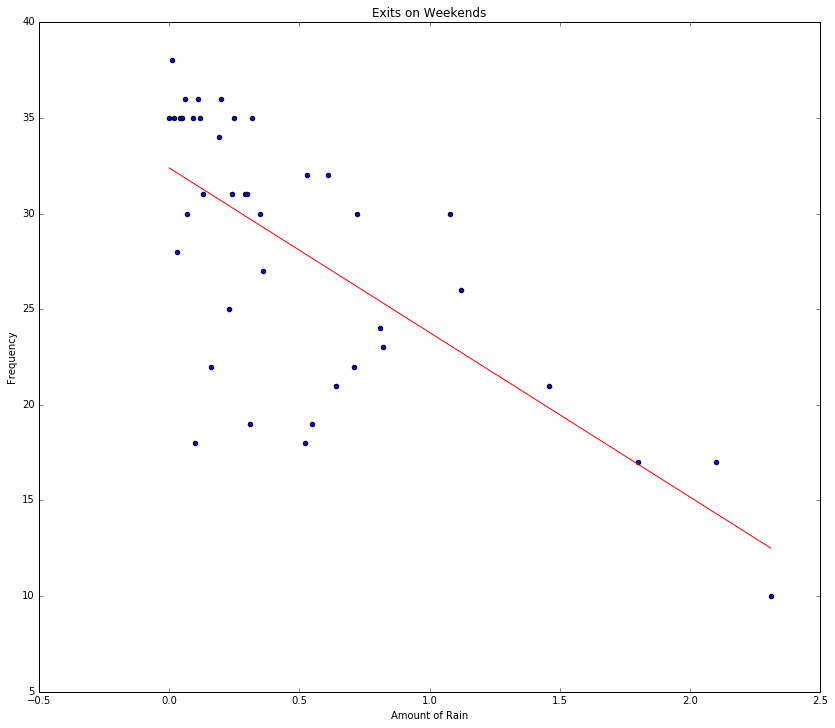

In [85]:
for i in range(len(mean_weekend_rain_df.index)):
        value = mean_weekend_rain_df.measurement[i]
        mean_weekend_rain_df.mean_entries[i] = merge[merge.prcp==value].entries_per_hour.mean()
        mean_weekend_rain_df.mean_exits[i] = merge[merge.prcp==value].exits_per_hour.mean()

x = mean_weekend_rain_df.measurement
y = mean_weekend_rain_df.mean_entries


fig, ax = plt.subplots(figsize=(14,12))
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
plt.title("Entries on Weekends")
plt.xlabel("Amount of Rain")
plt.ylabel("Frequency")
plt.show()

x = mean_weekend_rain_df.measurement
y = mean_weekend_rain_df.mean_exits

fig, ax = plt.subplots(figsize=(14,12))
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
plt.title("Exits on Weekends")
plt.xlabel("Amount of Rain")
plt.ylabel("Frequency")
plt.show()

For work days (neither holiday or weekend), it seems like the trendline stays exactly flat, suggesting that demand for MTA is a lot less elastic against the weather. This makes sense if most people who use the MTA on work days appreciate less choice in their decision to abstain.

When the means are calculated for only federal holidays and weekends:

In [ ]:
for i in range(len(play_rain_df.index)):
        value = play_rain_df.measurement[i]
        play_rain_df.mean_entries.loc[i] = play_days[play_days.prcp==value].period_entries.mean()
        play_rain_df.mean_exits.loc[i] = play_days[play_days.prcp==value].period_exits.mean()

x = play_rain_df.measurement
y = play_rain_df.mean_entries

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
plt.title("Mean Entries Against Precipitation for Weekends & Holidays")
plt.xlabel("Amount of Rain")
plt.ylabel("Frequency")

x = play_rain_df.measurement
y = play_rain_df.mean_exits

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.scatter(x, y)
plt.title("Mean Exits Against Precipitation for Weekends & Holidays")
plt.xlabel("Amount of Rain")
plt.ylabel("Frequency")

In [ ]:
workdays_pmf = ts2.Pmf(work_days.period_entries)
play_days_pmf = ts2.Pmf(play_days.period_entries)

#exclude 0, because the difference is so large that it obscures other differences in the frame.
entries = range(10, 750)
diffs = []
for entry in entries:
    p1 = workdays_pmf.Prob(entry)
    p2 = play_days_pmf.Prob(entry)
    diff = 100*(p1-p2)
    diffs.append(diff)

tp.Bar(entries, diffs)
tp.Show(title="Work Days", xlabel="entries \n Weekends and Holidays", ylabel = 'probability', axis=[10, 750, -0.14, 0.04])